Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [10]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import pandas
import numpy as np
import brfss

df = brfss.ReadBrfss()

df.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3
count,410856.000000,414509.000000,390399.000000,414509.000000,398484.000000,409129.000000
mean,54.862180,1.624368,79.721319,561.774700,78.992453,168.825190
std,16.737702,0.484286,20.565164,1076.538764,19.546157,10.352653
min,18.000000,1.000000,22.727273,1.695143,20.000000,61.000000
25%,43.000000,1.000000,64.545455,97.006804,64.550000,160.000000
50%,55.000000,2.000000,77.272727,234.010543,77.270000,168.000000
75%,67.000000,2.000000,90.909091,590.775576,90.910000,175.000000
max,99.000000,2.000000,342.272727,60995.111700,309.090000,236.000000


After importing the BRFSS data, I cleaned up the height and weight columns by removing any null values in the data set.

In [6]:
df = df.dropna(subset=['wtkg2', 'htm3'])
print len(df['wtkg2']) == len(df['htm3'])

True


Then I computed the log of all the weight values and I used it in the linear least squares fit as the dependent variable with the height as the independent variable.

In [8]:
import thinkstats2

df['logwtkg'] = np.log(df['wtkg2'])

inter, slope = thinkstats2.LeastSquares(df['htm3'], df['logwtkg'])

print 'The linear fit slope:', slope
print 'The linear fit intercept', inter

The linear fit slope: 0.0121609976398
The linear fit intercept 2.28665216293


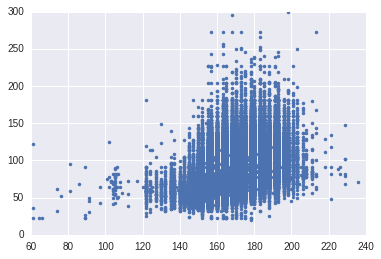

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(df['htm3'], df['wtkg2'], '.')
plt.show()

Because the scatter plot does not look linear, but rather a type of tilted exponential curve, I tried fitting an exponenetial curve to the data. This means that the weight is not really a linear function of a person's height, but the data more closely resembles that the weight is more of a function of a base to the power which is the value of the person's height. With the linear fit data above, I created a graph of that data.

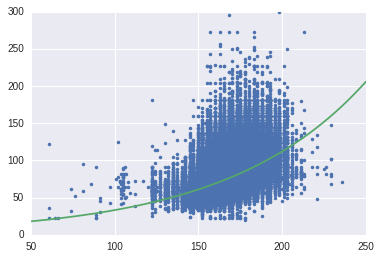

In [18]:
pred_hts = np.linspace(50, 250, 200)
pred_wts = np.exp(slope*pred_hts+inter)

plt.plot(df['htm3'], df['wtkg2'], '.')
plt.plot(pred_hts, pred_wts)
plt.show()

In [24]:
mn_wt = np.exp(slope*df['htm3'].mean()+inter)
print 'Weight at at mean height:', mn_wt
print 'Weight is doubled every', np.log(2)/slope, 'cm'

Weight at at mean height: 76.8094724945
Weight is doubled every 56.997559007 cm


Thus at the mean height of 168.8 cm, the predicted weight is 76.8 kg. However, the weight is <b>doubled</b> about every 57 centimeters.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.